# Exploratory Data Analysis for NBA's Player 1996 - 2020 era 🏀

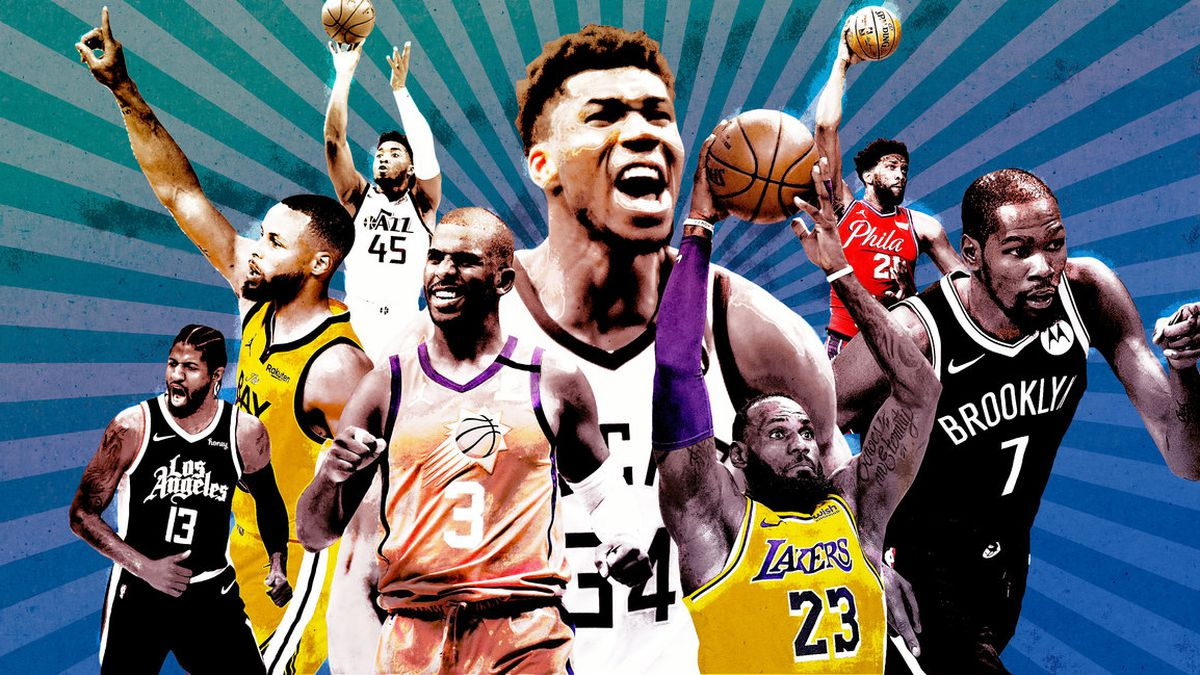

## A. Overview

NBA merupakan salah satu kejuaraan bola basket yang paling bergengsi di dunia, tak heran beberapa dari club yang mengikuti kejuaraan tersebut berusaha semaksimal mungkin untuk mendapatkan gelar juara. Selain itu peran dari tiap roster sangat penting sekali dalam berlaga seperti pemain - pemain bintang yang terlihat memiliki kemampuan yang sangat bagus dari tiap laga yang pernah mereka ikuti. Untuk itu, suatu hal yang menarik bagi seorang data science dalam melihat beberapa pemain bintang yang berlaga dan melihat seberapa besar mereka berpengaruh dalam tim. 
### Lets go check this data seasons !! 😃 👊

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style='whitegrid')

In [2]:
df = pd.read_csv('/Users/user/Desktop/Personal Project/Dataset/all_seasons.csv')
df.drop(columns='Unnamed: 0',inplace=True)

In [3]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


### Checking missing value

In [4]:
df.isnull().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11700 non-null  object 
 1   team_abbreviation  11700 non-null  object 
 2   age                11700 non-null  float64
 3   player_height      11700 non-null  float64
 4   player_weight      11700 non-null  float64
 5   college            11700 non-null  object 
 6   country            11700 non-null  object 
 7   draft_year         11700 non-null  object 
 8   draft_round        11700 non-null  object 
 9   draft_number       11700 non-null  object 
 10  gp                 11700 non-null  int64  
 11  pts                11700 non-null  float64
 12  reb                11700 non-null  float64
 13  ast                11700 non-null  float64
 14  net_rating         11700 non-null  float64
 15  oreb_pct           11700 non-null  float64
 16  dreb_pct           117

In [6]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


### Is there any correlation ?

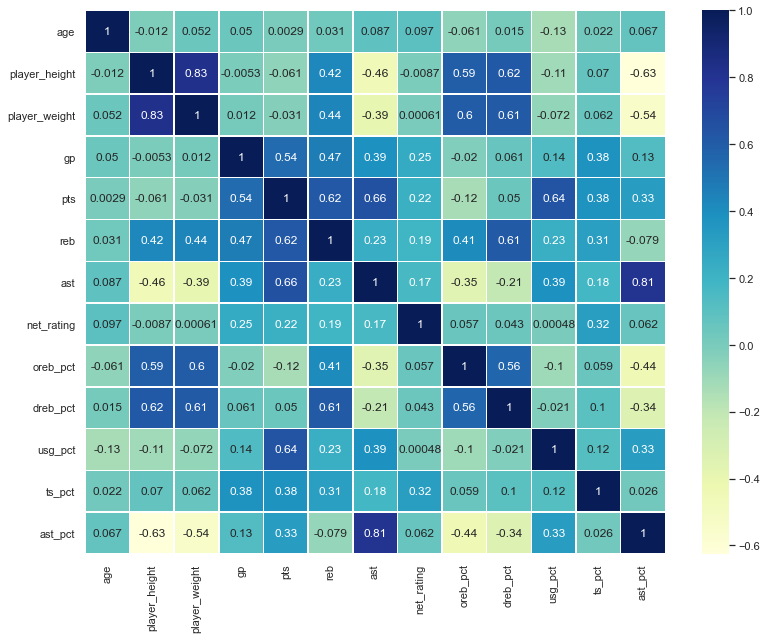

In [7]:
plt.subplots(figsize=(13, 10))
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True, linewidths=0.5)
plt.show()

#### Beberapa gambaran dari heatmap chart :
- player_height & player_weight memiliki korelasi positif dengan oreb_pct & dreb_pct ,menyatakan bahwa pemain yang lebih tinggi dan memiliki berat yang lebih besar dari lawan akan lebih mendapatkan banyak rebound.
- player_height & player_weight memiliki korelasi negatif dengan ast_pct , menyatakan bahwa pemain dengan tinggi yang lebih  pendek cenderung memiliki persentase assist yang lebih besar.

## B. Exploratory Data Analysis 😔

### Rata- rata tinggi pemain tiap musim

In [8]:
data = df[['season','player_height']].groupby('season')['player_height'].mean().reset_index()

In [9]:
data.head()

,season,player_height
0,1996-97,200.994830
1,1997-98,200.619499
2,1998-99,200.903007
3,1999-00,200.920959
4,2000-01,200.752154


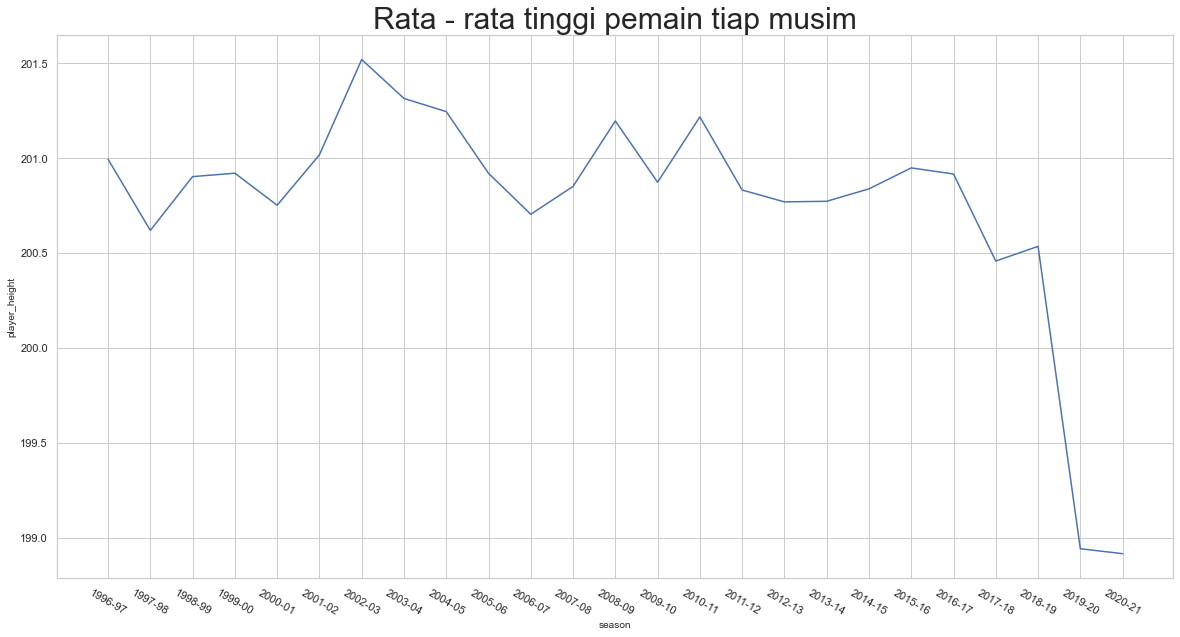

In [10]:
plt.figure(figsize=(20,10))
plt.plot(data.set_index('season'))
plt.title('Rata - rata tinggi pemain tiap musim', fontsize=30)
plt.xlabel('season',fontsize=10)
plt.xticks(rotation=-30)
plt.ylabel('player_height',fontsize=10)
plt.show()

Rata-rata tinggi badan dari tiap pemain NBA sepertinya sudah mengalami tren penurunan. Mungkin shoot three point dalam tiap pertandingan juga merupakan hal yang sangat penting untuk tim yang memprioritaskan shooter jarak jauh daripada yang memiliki badan besar. Sebagai contoh hal ini ditunjukan oleh Stephen Curry maupun Klay Thompson dari Golden State Warrior yang selalu melakukan temabakan 3 poin dari tiap laga yang pernah diikuti, dan hal tersebut bisa dibilang cukup maksimal dengan peran curry maupun thompson dalam tim hingga Golden State Warrior sering memasuki babak final NBA dan mendapat beberapa kali gelar juara 🥇

### Rata - rata usia pemain tiap musim

In [11]:
data1 = df[['season','age']].groupby('season')['age'].mean().reset_index()

In [12]:
data1.head()

,season,age
0,1996-97,27.963719
1,1997-98,28.084282
2,1998-99,28.002278
3,1999-00,28.107306
4,2000-01,28.097506


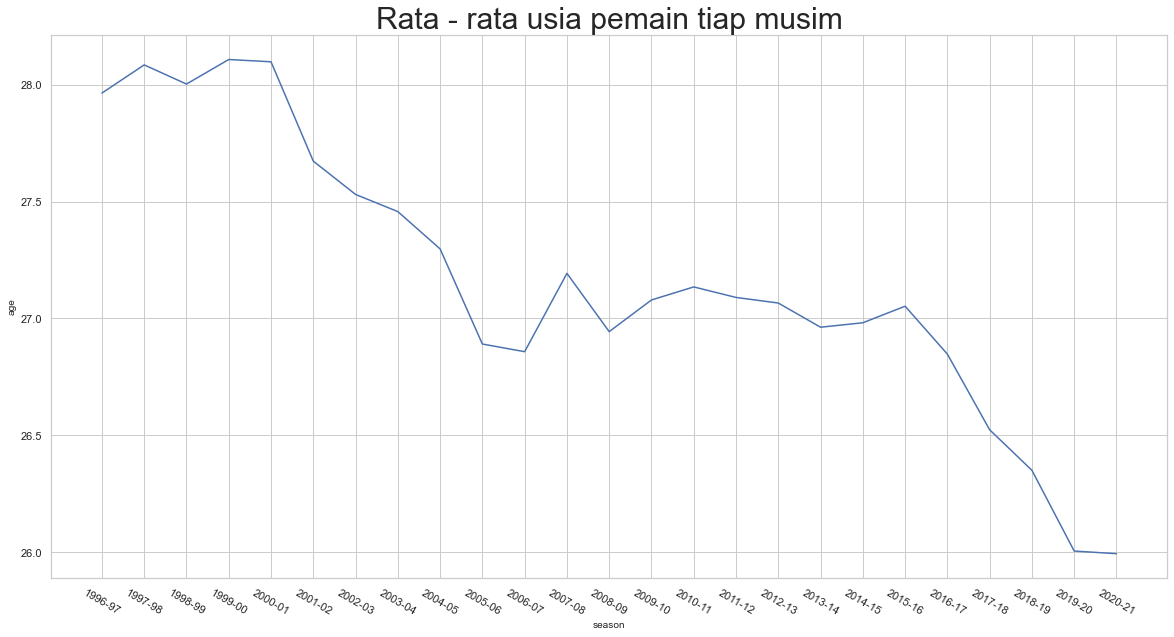

In [13]:
plt.figure(figsize=(20,10))
plt.plot(data1.set_index('season'))
plt.title('Rata - rata usia pemain tiap musim', fontsize=30)
plt.xlabel('season',fontsize=10)
plt.xticks(rotation=-30)
plt.ylabel('age',fontsize=10)
plt.show()

Sama halnya dengan tinggi badan, rata-rata usia dari tiap pemain NBA juga mengalami tren penurunan dalam 25 tahun terakhir. Dalam hal ini sepertinya dari tiap tim lebih berinvestasi dan memprioritaskan para pemain muda yang ada (Pemuda = masa depan 😁). Seperti kata bung karno "Beri aku 1.000 orang tua, niscaya akan kucabut semeru dari akarnya. Beri aku 10 pemuda niscaya akan kuguncangkan dunia"😅.

### Draft Lottery NBA

Draft Lottery NBA merupakan acara tahunan yang diselenggarakan oleh NBA. Pada acara ini, tim-tim NBA yang gagal lolos putaran playoff pada musim sebelumnya mendapat kesempatan berpartisipasi dalam proses lotere untuk menentukan urutan memilih dalam draft NBA berikutnya.

In [14]:
draft_pemain = df[df['draft_year'] == df['season'].apply(lambda x: x[:4])]

lotere_picks = draft_pemain[draft_pemain.draft_number.isin(['1','2','3','4'])]

lotere_picks.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
15,Marcus Camby,TOR,23.0,210.82,99.79024,Massachusetts,USA,1996,1,2,...,14.8,6.3,1.5,-1.5,0.079,0.165,0.241,0.523,0.092,1996-97
132,Stephon Marbury,MIN,20.0,187.96,81.64656,Georgia Tech,USA,1996,1,4,...,15.8,2.7,7.8,-3.1,0.028,0.066,0.244,0.519,0.373,1996-97
199,Shareef Abdur-Rahim,VAN,20.0,205.74,104.32616,California,USA,1996,1,3,...,18.7,6.9,2.2,-12.3,0.089,0.142,0.275,0.518,0.120,1996-97
290,Allen Iverson,PHI,22.0,182.88,74.84268,Georgetown,USA,1996,1,1,...,23.5,4.1,7.5,-7.0,0.040,0.072,0.284,0.513,0.320,1996-97
577,Antonio Daniels,VAN,23.0,193.04,88.45044,Bowling Green,USA,1997,1,4,...,7.8,1.9,4.5,-12.8,0.013,0.069,0.178,0.465,0.268,1997-98


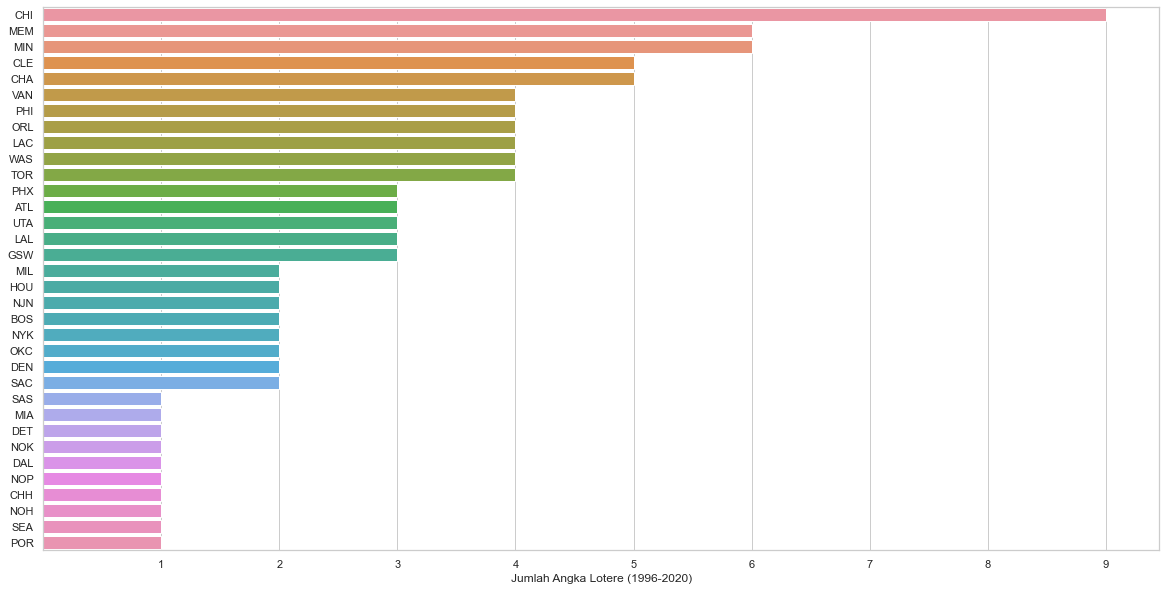

In [15]:
lotere_picks_tim = lotere_picks['team_abbreviation'].value_counts()

plt.figure(figsize=(20,10))

sns.barplot(lotere_picks_tim, lotere_picks_tim.index)

plt.xlabel('Jumlah Angka Lotere (1996-2020)')
plt.xticks([i for i in range(1,10)])

plt.show()

Note : Chicago Bulls memimpin dengan 9 Lottery Pick dalam rentang waktu 25 tahun, diikuti oleh Minnesota Timberwolves dan Memphis Grizzlies.

### 1996 vs 2020: Distribusi poin tiap game

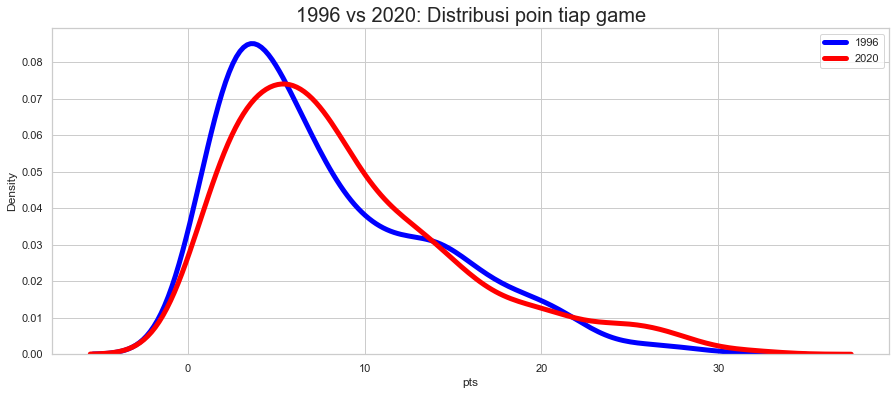

In [16]:
plt.figure(figsize=(15,6))

seasons = list(df['season'].unique())
season_awal = seasons[0]
season_akhir = seasons[-1]

sns.kdeplot(df[df['season'] == season_awal]['pts'], color='blue', label='1996', linewidth=5)
sns.kdeplot(df[df['season'] == season_akhir]['pts'], color='red', label='2020', linewidth= 5)

plt.title("1996 vs 2020: Distribusi poin tiap game", fontsize=20)
    
plt.legend()

Dilihat dari distribusinya, sebagian besar pemain pada tahun 2020 memiliki rata-rata poin/game yang lebih tinggi daripada pemain pada tahun 1996. > 25 poin pergame pada tahun 2020 merupakan hal yang wajar dibandingkan pada tahun 1996.

Sementara dari plotnya memberikan informasi tentang seluruh liga secara sekilas, bagaimana para pemain bintang dari era yang berbeda bersaing satu sama lain secara statistik.

## C. Individual Player Analysis

### 1. Top 10 tallest player

In [17]:
players_unique = df.drop_duplicates(subset='player_name')
tallest = players_unique.sort_values('player_height', ascending=False)
top10tallest = tallest[:10]

<AxesSubplot:xlabel='player_name', ylabel='player_height'>

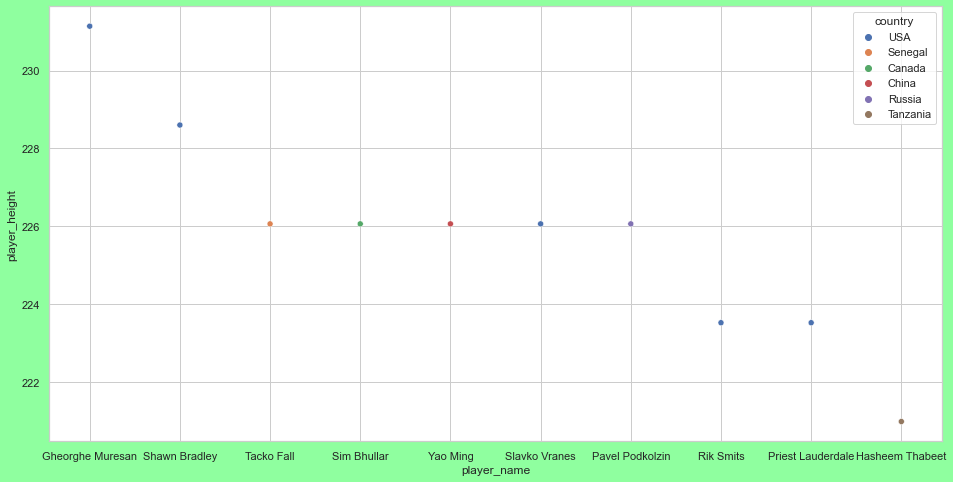

In [18]:
fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('xkcd:mint green')
sns.scatterplot(x='player_name', y='player_height', hue='country', data=top10tallest)

Dari plot tersebut dapat dilihat Gheorghe Muresan (USA) yang mendapat nominasi sebagai pemain paling tinggi, dengan tinggi sebesar 230+ cm, dan negara USA yang mendominasi dari segi pemain - pemain yang memiliki tinggi 210+ cm

### 2. Top 10 Highest player pts

In [19]:
players_unique = df.drop_duplicates(subset='player_name')
highest_pts = players_unique.sort_values('pts', ascending=False)
top10highest_pts = highest_pts[:10]

<AxesSubplot:xlabel='pts', ylabel='player_name'>

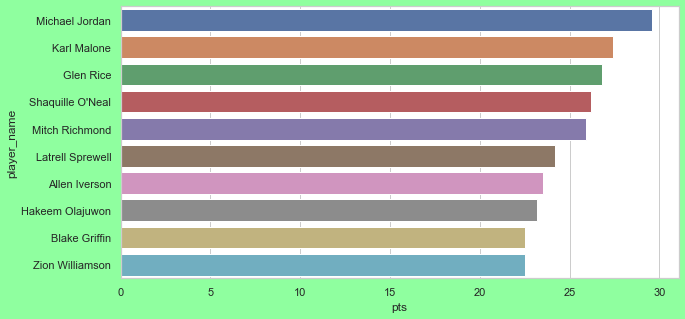

In [20]:
fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(x='pts', y='player_name', data=top10highest_pts)

Michael Jordan mendapat nominasi sebagai pemain dengan pts tertinggi pada laga yang pernah dia ikuti.

### 3. Top 10 Highest player rebound

In [21]:
players_unique = df.drop_duplicates(subset='player_name')
highest_rebound = players_unique.sort_values('reb', ascending=False)
top10highest_rebound = highest_rebound[:10]

<AxesSubplot:xlabel='player_name', ylabel='reb'>

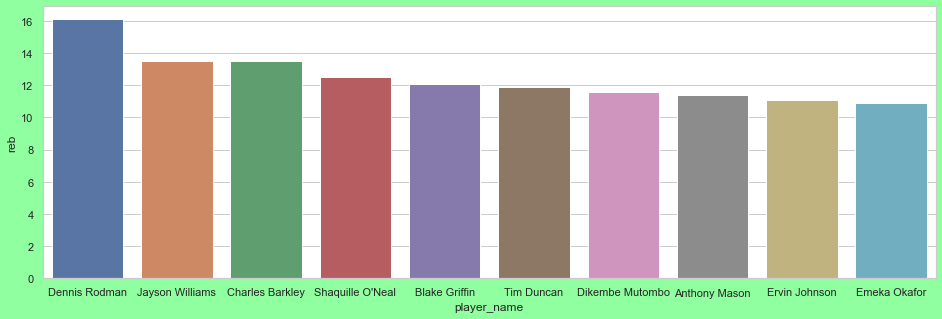

In [22]:
fig = plt.figure(figsize=(16,5))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(x='player_name', y='reb', data=top10highest_rebound)

Dennis Rodman memiliki leaderboard paling tinggi dalam konteks pemain paling banyak melakukan rebound dalam laga yang pernah ia ikuti diikuti dari belakng oleh Jayson Williamms dan Charles Barkley dengan statistik yang sama.

### 4. Top 10 Highest player assist

In [23]:
players_unique = df.drop_duplicates(subset='player_name')
highest_assist = players_unique.sort_values('ast', ascending=False)
top10highest_assist = highest_assist[:10]

<AxesSubplot:xlabel='ast', ylabel='player_name'>

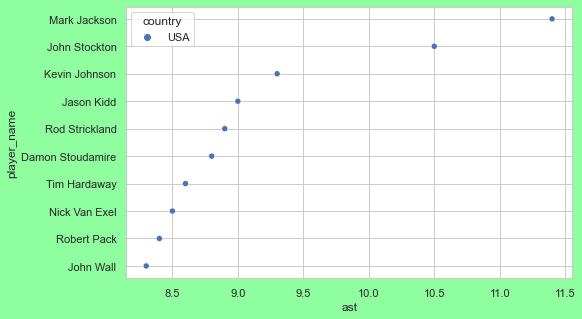

In [24]:
fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('xkcd:mint green')
sns.scatterplot(x='ast', y='player_name',hue='country', data=top10highest_assist)

Dari plot tersebut dapat dilihat bahwa negara USA yang mendominasi dari segi player assist dengan Mark Jackson yang menjadi top leaderboardnya lalu diikuti oleh John Stockton dekat dari belakang.

###  5. Selama 24 tahun terakhir siapa sajakah player yang menjadi Top leaderboard scoring ?

In [25]:
def get_top_scoring(title, n_players = 1):
    top_scoring_per_season = df.groupby('season')['pts'].nlargest(n_players).reset_index()

    top_scorers = df.iloc[top_scoring_per_season['level_1']].player_name.value_counts().reset_index()
    
    top_scorers = top_scorers[:10]

    top_scorers.rename(columns={'index':'player_name', 'player_name':'frequency'}, inplace=True)

    sns.barplot(x='frequency', y='player_name', data=top_scorers)
    plt.ylabel('Player Name')
    plt.title(title, fontsize=15)
    plt.show()

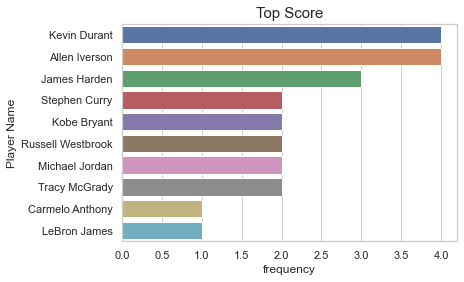

In [26]:
get_top_scoring('Top Score')

disini kita memiliki KD dan AI sebagai Top Scoring Leaderboard selama musim berlangsung.

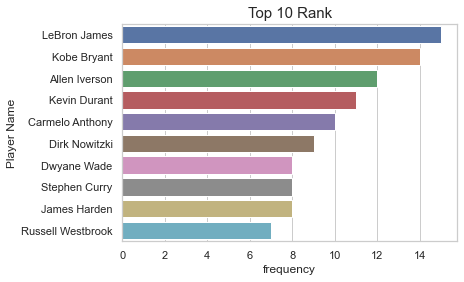

In [27]:
get_top_scoring('Top 10 Rank',10)

Dapat dilihat Lebron James yang menjadi top rank seasoning diikuti dekat dari belakang oleh Kobe Bryant, disini kita dapat refresh sejenak terkait Kobe. Dengan menjadinya top rank kobe bryant yang sudah meninggal pada kecelakaan helikopter yang dialaminya pada Januari 2020 lalu menjadi salah satu contoh untuk para pemain basket yang sedang menjalankan karirnya sekarang, berikanlah permainan sebaik mungkin dalam laga yang diikuti karna jasa dan kontribusi terhadap tim dan juga prestasi selalu terukir dalam sejarah dan jangan pernah merasa puas dalam tiap kemenangan laga. 

### Cheers 🥂  -- Pray for KOBE

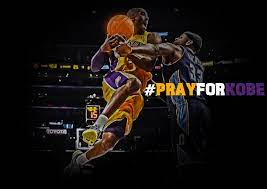


## Thank You All !